# Network Science and Graph Learning main Notebook

This notebook uses various components (from libraries or other files in this directory) to create the illustrations and components used in the `nsgl_macquart_de_terline.pdf` project report.

Import required libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import random
from LinkPrediction import Jaccard, CommonNeighbors, AdamicAdar

2.a. We consider the three networks: Caltech, MIT and Johns Hopkins.

We seek to plot the degree distribution for each of these.

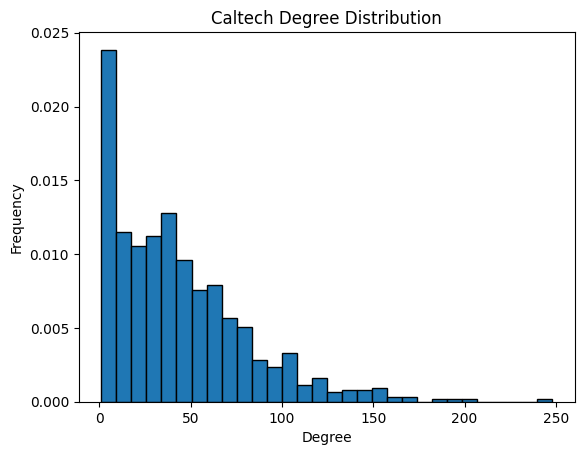

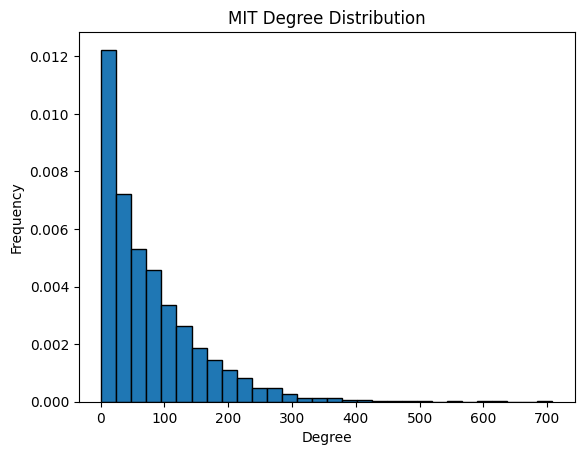

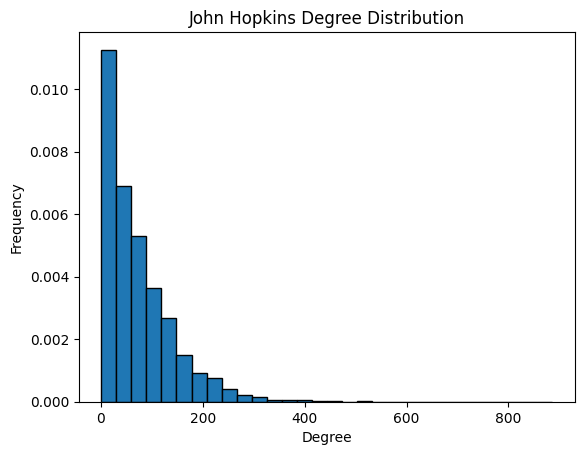

In [9]:
# Extract the data individually

caltech_gml = 'data/Caltech36.gml'
mit_gml = 'data/MIT8.gml'
john_hopkins_gml = 'data/Johns Hopkins55.gml'

# Load the graphs
caltech_graph = nx.read_gml(caltech_gml)
mit_graph = nx.read_gml(mit_gml)
john_hopkins_graph = nx.read_gml(john_hopkins_gml)

# Function to plot degree distribution
def plot_degree_distribution(graph, title, savefig=True):
    degrees = [degree for node, degree in graph.degree()]
    plt.figure()
    plt.hist(degrees, bins=30, density=True, edgecolor='black')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    if savefig:
        title = title.replace(" ", "_").lower()
        plt.savefig(f'images_buffer/{title}.png')
    plt.show()
    
# Plot degree distributions
plot_degree_distribution(caltech_graph, 'Caltech Degree Distribution')
plot_degree_distribution(mit_graph, 'MIT Degree Distribution')
plot_degree_distribution(john_hopkins_graph, 'John Hopkins Degree Distribution')
    

2.b. Compute the global clustering coeﬃcient and mean local clustering coeﬃcient for each of the 3 networks. In addition compute the edge density of each network.

In [14]:
def network_statistics(network):
    # For the network network, compute the global clustering coefficient, mean local clustering coefficient, and edge density
    return {
        'global_clustering_coefficient': nx.transitivity(network), # same as global clustering coefficient
        'mean_local_clustering_coefficient': nx.average_clustering(network), # mean local clustering coefficient
        'edge_density': nx.density(network) # edge density
    }
    
# Compute statistics for each network
caltech_stats = network_statistics(caltech_graph)
mit_stats = network_statistics(mit_graph)
john_hopkins_stats = network_statistics(john_hopkins_graph)

# Create a latex table with columns (College/University, Global Clustering Coefficient, Mean Local Clustering Coefficient, Edge Density) 
# and rows for each of the three networks through a DataFrame

stats_df = pd.DataFrame({
    'College/University': ['Caltech', 'MIT', 'John Hopkins'],
    'Global Clustering Coefficient': [caltech_stats['global_clustering_coefficient'], mit_stats['global_clustering_coefficient'], john_hopkins_stats['global_clustering_coefficient']],
    'Mean Local Clustering Coefficient': [caltech_stats['mean_local_clustering_coefficient'], mit_stats['mean_local_clustering_coefficient'], john_hopkins_stats['mean_local_clustering_coefficient']],
    'Edge Density': [caltech_stats['edge_density'], mit_stats['edge_density'], john_hopkins_stats['edge_density']]
})

latex_table = stats_df.to_latex(index=False, float_format="%.6f")
print(latex_table)


\begin{tabular}{lrrr}
\toprule
College/University & Global Clustering Coefficient & Mean Local Clustering Coefficient & Edge Density \\
\midrule
Caltech & 0.291283 & 0.409294 & 0.056404 \\
MIT & 0.180288 & 0.271219 & 0.012118 \\
John Hopkins & 0.193161 & 0.268393 & 0.013910 \\
\bottomrule
\end{tabular}



2.c. For each network, we scatter plot the degree versus local clustering coeﬃcient for each network node.

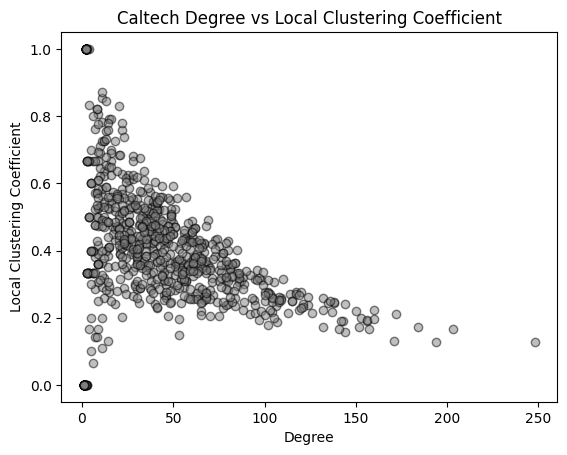

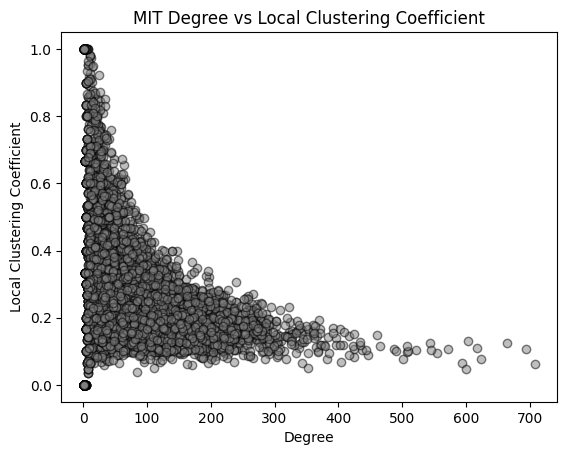

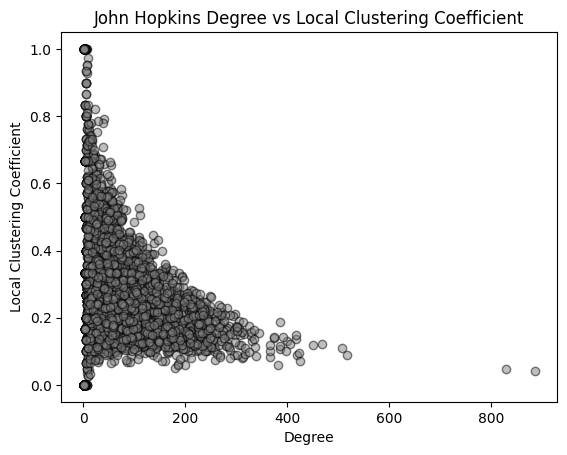

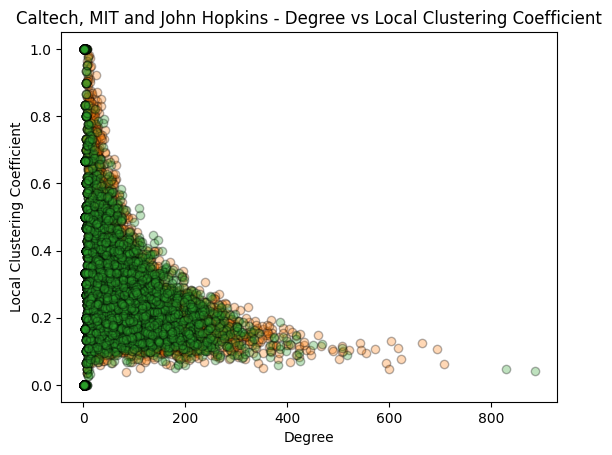

In [ ]:
# For each network, plot degree versus local clustering coefficient for each node

def plot_degree_vs_clustering(graph, title, savefig=True):
    degrees = dict(graph.degree())
    clustering_coeffs = nx.clustering(graph)
    
    degree_values = [degrees[node] for node in graph.nodes()]
    clustering_values = [clustering_coeffs[node] for node in graph.nodes()]
    
    plt.figure()
    plt.scatter(degree_values, clustering_values, alpha=0.5, c="gray", edgecolors='black')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Local Clustering Coefficient')
    if savefig:
        title = title.replace(" ", "_").lower()
        plt.savefig(f'images_buffer/{title}.png')
    plt.show()
    
plot_degree_vs_clustering(caltech_graph, 'Caltech Degree vs Local Clustering Coefficient')
plot_degree_vs_clustering(mit_graph, 'MIT Degree vs Local Clustering Coefficient')
plot_degree_vs_clustering(john_hopkins_graph, 'John Hopkins Degree vs Local Clustering Coefficient')

# or in the same plot
def plot_degree_vs_clustering_all(graph_list, graph_names, title, savefig=True):
    plt.figure()
    for index, graph in enumerate(graph_list):
        
        degrees = dict(graph.degree())
        clustering_coeffs = nx.clustering(graph)
        
        degree_values = [degrees[node] for node in graph.nodes()]
        clustering_values = [clustering_coeffs[node] for node in graph.nodes()]
        
        plt.scatter(degree_values, clustering_values, alpha=0.3, edgecolors='black', label=graph_names[index])
        
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Local Clustering Coefficient')
    plt.legend()
    if savefig:
        title = title.replace(" ", "_").lower()
        plt.savefig(f'images_buffer/{title}.png')
    plt.show()
    
plot_degree_vs_clustering_all([caltech_graph, mit_graph, john_hopkins_graph], ["Caltech", "MIT", "John Hopkins"], 'Caltech, MIT and John Hopkins - Degree vs Local Clustering Coefficient')

In [5]:
# List all GML files in the data directory
metrics = []
files = glob.glob('data/*.gml')

print(f"Found {len(files)} networks.")

for index, file in enumerate(files):
    
    print(f"Starting treatment for file {index + 1}/{len(files)}")
    
    # Read the graph
    # FB100 files are GML. 
    G = nx.read_gml(file)
    # Treat as simple graph (undirected, no self-loops/multiedges)
    G = nx.Graph(G)
    
    # Get network size
    n = G.number_of_nodes()
    
    # Calculate assortativity for each attribute
    # student/faculty status ('student_fac')
    try:
        r_student = nx.attribute_assortativity_coefficient(G, 'student_fac')
    except Exception as e:
        r_student = np.nan
        
    # major ('major_index')
    try:
        r_major = nx.attribute_assortativity_coefficient(G, 'major_index')
    except Exception as e:
        r_major = np.nan

    # vertex degree
    try:
        r_degree = nx.degree_assortativity_coefficient(G)
    except Exception as e:
        r_degree = np.nan
        
    # dorm ('dorm')
    try:
        r_dorm = nx.attribute_assortativity_coefficient(G, 'dorm')
    except Exception as e:
        r_dorm = np.nan
        
    # gender ('gender')
    try:
        r_gender = nx.attribute_assortativity_coefficient(G, 'gender')
    except Exception as e:
        r_gender = np.nan
        
    metrics.append({
        'network': os.path.basename(file),
        'n': n,
        'student_fac': r_student,
        'major': r_major,
        'degree': r_degree,
        'dorm': r_dorm,
        'gender': r_gender
    })

df_metrics = pd.DataFrame(metrics)
# Display first few rows to verify
print(df_metrics.head())
print(df_metrics.info())

Found 100 networks.
Starting treatment for file 1/100
Starting treatment for file 2/100
Starting treatment for file 3/100
Starting treatment for file 4/100
Starting treatment for file 5/100
Starting treatment for file 6/100
Starting treatment for file 7/100
Starting treatment for file 8/100
Starting treatment for file 9/100
Starting treatment for file 10/100
Starting treatment for file 11/100
Starting treatment for file 12/100
Starting treatment for file 13/100
Starting treatment for file 14/100
Starting treatment for file 15/100
Starting treatment for file 16/100
Starting treatment for file 17/100
Starting treatment for file 18/100
Starting treatment for file 19/100
Starting treatment for file 20/100
Starting treatment for file 21/100
Starting treatment for file 22/100
Starting treatment for file 23/100
Starting treatment for file 24/100
Starting treatment for file 25/100
Starting treatment for file 26/100
Starting treatment for file 27/100
Starting treatment for file 28/100
Starting 

In [12]:
# save df_metrics to csv
df_metrics.to_csv('assortativity_metrics_fb100.csv', index=False)

In [13]:
summary_stats = df_metrics.describe()

# Create a latex table for the summary statistics of the assortativity coefficients
latex_summary_table = summary_stats[['student_fac', 'major', 'degree', 'dorm', 'gender']].to_latex(float_format="%.6f")
print(latex_summary_table)

\begin{tabular}{lrrrrr}
\toprule
 & student_fac & major & degree & dorm & gender \\
\midrule
count & 100.000000 & 100.000000 & 100.000000 & 100.000000 & 100.000000 \\
mean & 0.322738 & 0.051115 & 0.062648 & 0.175106 & 0.042958 \\
std & 0.092508 & 0.017261 & 0.052845 & 0.057733 & 0.038569 \\
min & 0.110200 & 0.028574 & -0.065273 & 0.074814 & -0.082493 \\
25% & 0.256311 & 0.039919 & 0.025204 & 0.131742 & 0.018481 \\
50% & 0.316925 & 0.046796 & 0.064705 & 0.172658 & 0.046710 \\
75% & 0.395228 & 0.054907 & 0.092888 & 0.202718 & 0.073286 \\
max & 0.542625 & 0.131654 & 0.196892 & 0.416017 & 0.124723 \\
\bottomrule
\end{tabular}



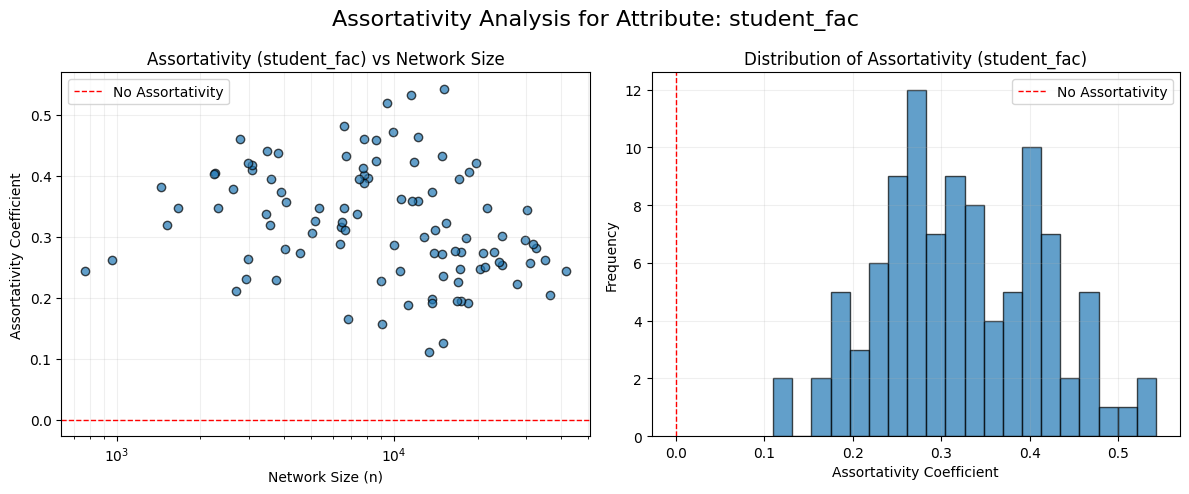

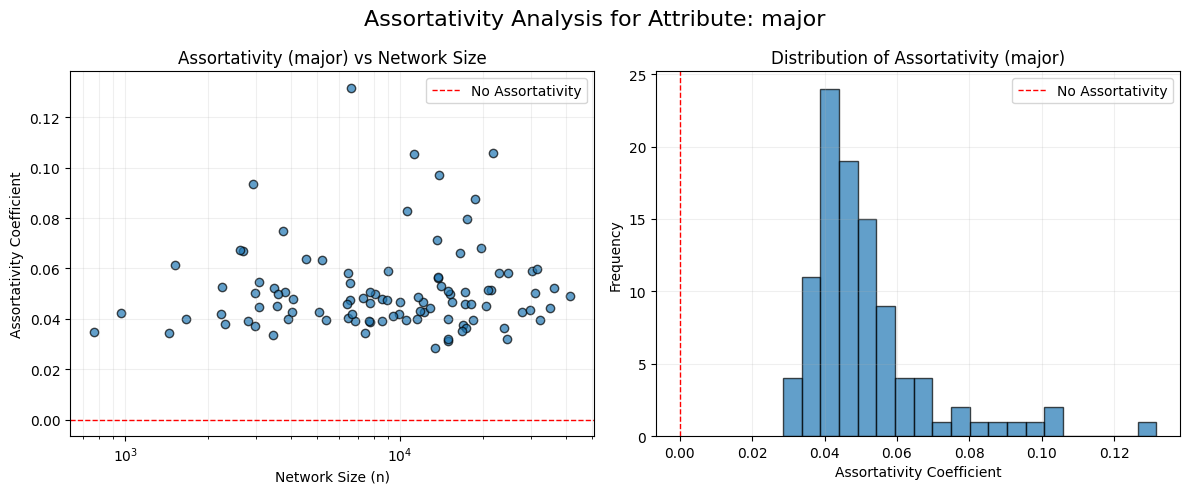

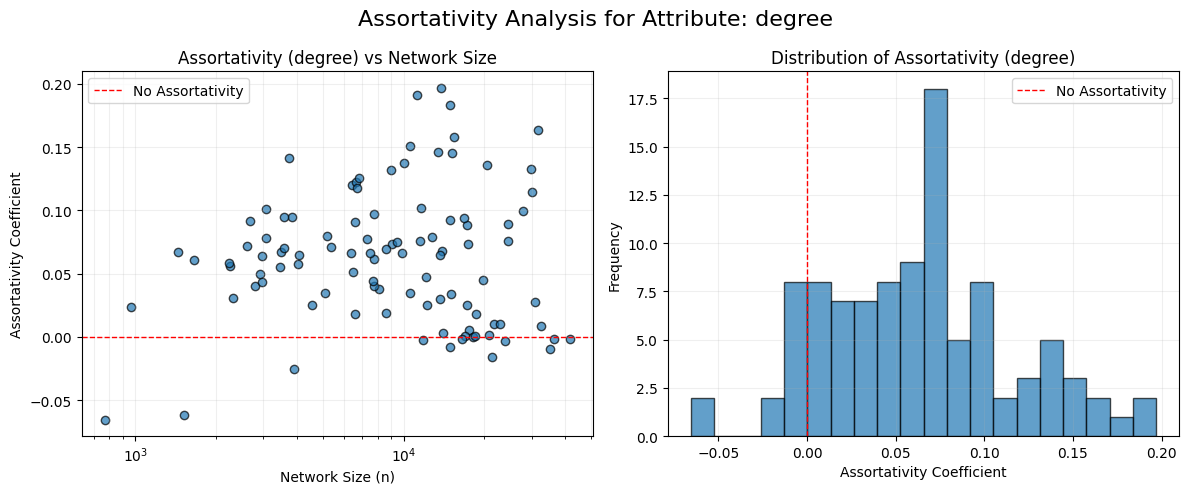

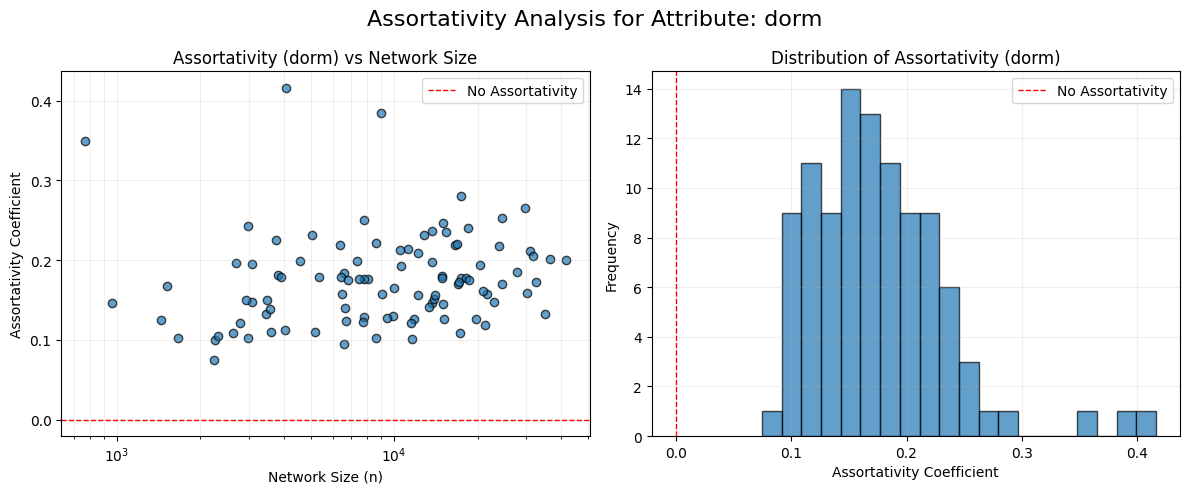

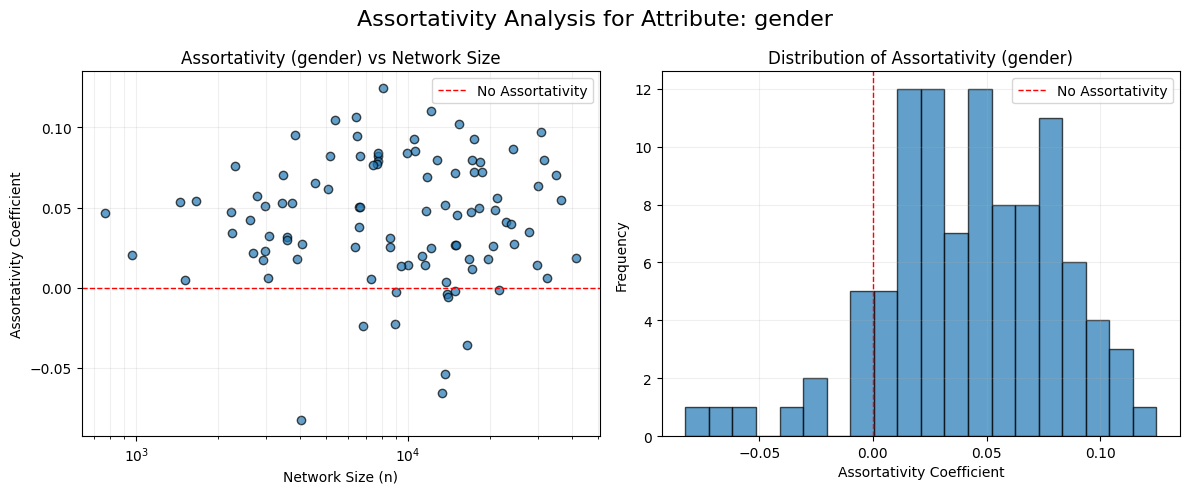

In [8]:
# Create 5 figures, each with two side-by-side subplots, one per attribute
# Left subplot: Scatter plot (Assortativity vs Network Size)
# Right subplot: Histogram (Distribution of Assortativity)

# Rows per attribute
attributes = ['student_fac', 'major', 'degree', 'dorm', 'gender']
for attr in attributes:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Left subplot: Scatter plot
    axs[0].scatter(df_metrics['n'], df_metrics[attr], alpha=0.7, edgecolors='black')
    
    # Add horizontal line at y=0 for reference (no assortativity)
    axs[0].axhline(0, color='red', linestyle='--', linewidth=1, label='No Assortativity')
    axs[0].set_title(f'Assortativity ({attr}) vs Network Size')
    axs[0].set_xlabel('Network Size (n)')
    axs[0].set_ylabel('Assortativity Coefficient')
    axs[0].set_xscale('log')
    axs[0].legend()
    axs[0].grid(True, which="both", ls="-", alpha=0.2)
    
    # Right subplot: Histogram
    axs[1].hist(df_metrics[attr].dropna(), bins=20, edgecolor='black', alpha=0.7)    
    
    # Add vertical line at x=0 for reference (no assortativity)
    axs[1].axvline(0, color='red', linestyle='--', linewidth=1, label='No Assortativity')
    axs[1].set_title(f'Distribution of Assortativity ({attr})')
    axs[1].set_xlabel('Assortativity Coefficient')
    axs[1].set_ylabel('Frequency')
    axs[1].grid(True, which="both", ls="-", alpha=0.2)
    axs[1].legend()
    
    plt.suptitle(f'Assortativity Analysis for Attribute: {attr}', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'images_buffer/assortativity_{attr}.png')
    plt.show()

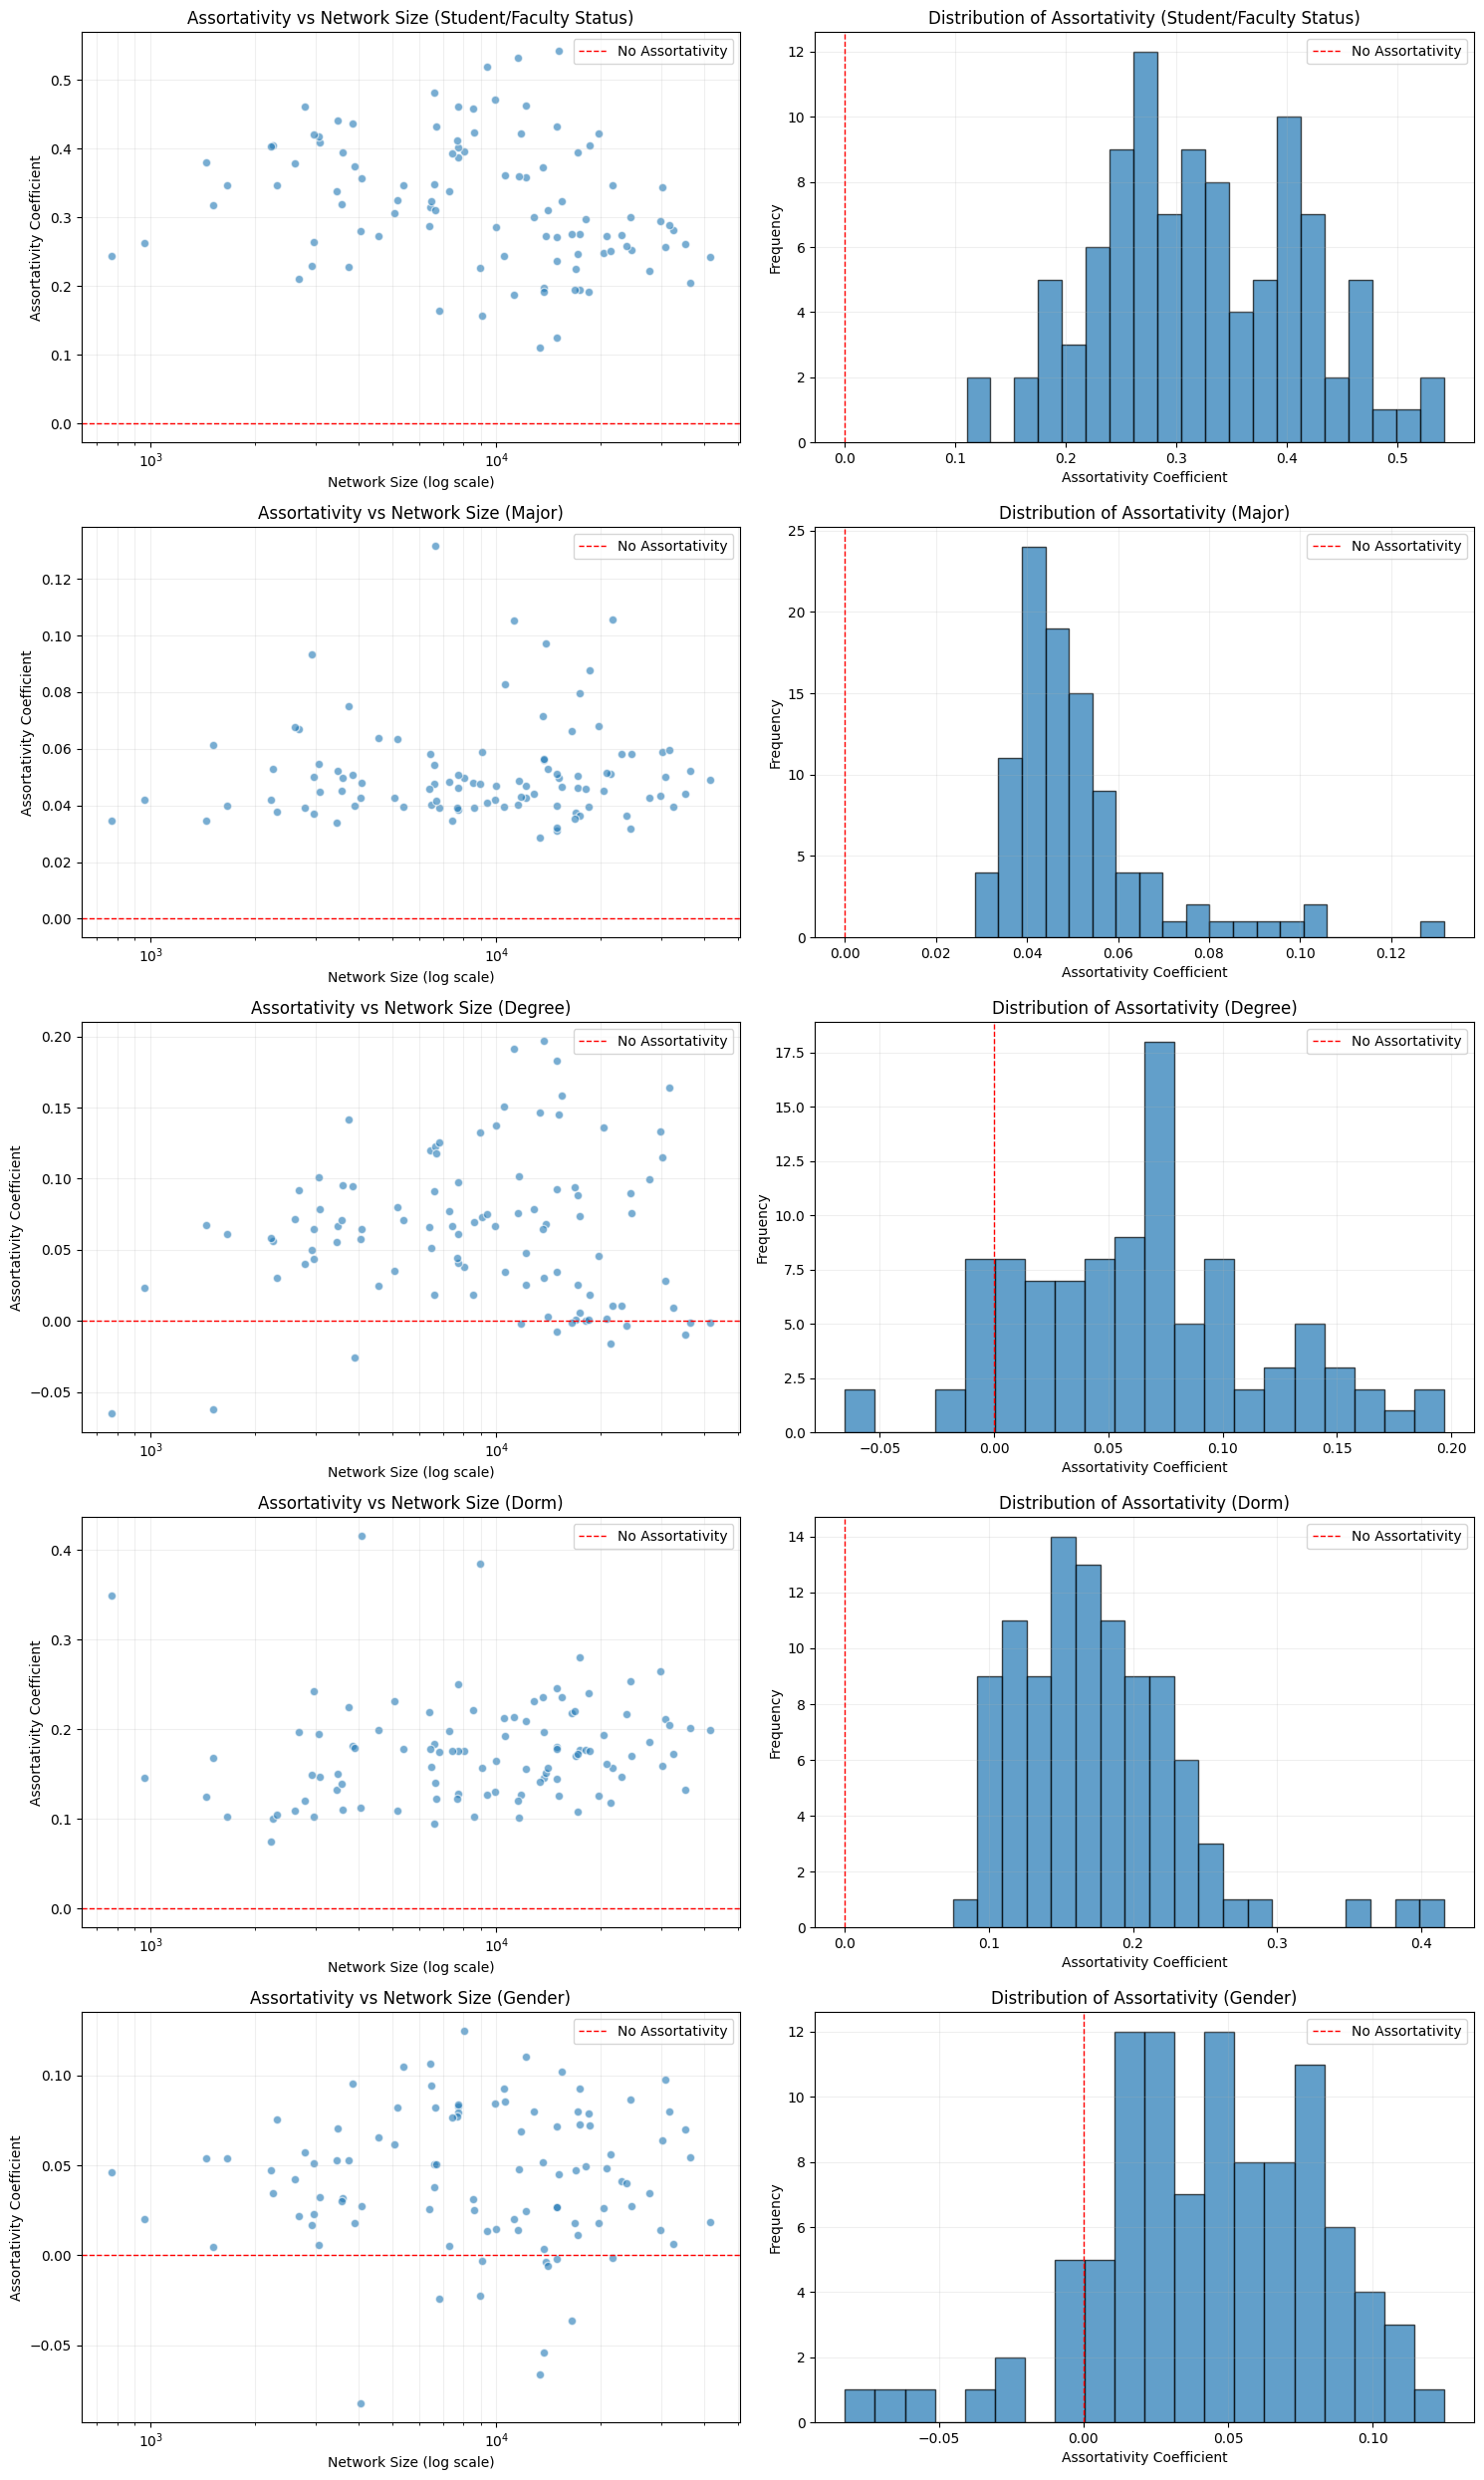

In [9]:
# Plotting the results
attributes = ['student_fac', 'major', 'degree', 'dorm', 'gender']
titles = ['Student/Faculty Status', 'Major', 'Degree', 'Dorm', 'Gender']

# Create a figure with subplots (5 rows, 2 columns)
# Left column: Scatter plot (Assortativity vs Network Size)
# Right column: Histogram (Distribution of Assortativity)
# Rows per attribute

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
plt.subplots_adjust(hspace=0.4)

for i, attr in enumerate(attributes):
    # Scatter plot
    ax_scatter = axes[i, 0]
    ax_scatter.scatter(df_metrics['n'], df_metrics[attr], alpha=0.6, edgecolors='w')
    ax_scatter.set_xscale('log')
    ax_scatter.axhline(0, color='red', linestyle='--', linewidth=1, label='No Assortativity')
    ax_scatter.set_title(f'Assortativity vs Network Size ({titles[i]})')
    ax_scatter.set_xlabel('Network Size (log scale)')
    ax_scatter.set_ylabel('Assortativity Coefficient')
    ax_scatter.grid(True, which="both", ls="-", alpha=0.2)
    
    # Histogram
    ax_hist = axes[i, 1]
    
    # Remove NaN values for histogram
    data = df_metrics[attr].dropna()
    ax_hist.hist(data, bins=20, edgecolor='black', alpha=0.7)
    ax_hist.axvline(0, color='red', linestyle='--', linewidth=1, label='No Assortativity')
    ax_hist.set_title(f'Distribution of Assortativity ({titles[i]})')
    ax_hist.set_xlabel('Assortativity Coefficient')
    ax_hist.set_ylabel('Frequency')
    ax_hist.grid(True, alpha=0.2)
    
    # Add legend
    ax_scatter.legend()
    ax_hist.legend()

plt.tight_layout()
plt.show()

In [3]:
def evaluate_link_predictor(G, PredictorClass, f=0.1, k_values=[50, 100, 200, 400]):
    """
    Évalue un prédicteur de liens.
    
    Args:
        G: Le graphe NetworkX complet.
        PredictorClass: La CLASSE du prédicteur (ex: Jaccard, CommonNeighbors), pas une instance.
        f: Fraction des arêtes à supprimer (test set).
        k_values: Liste des seuils pour le calcul de précision/rappel.
    """
    
    # 1. & 2. Suppression aléatoire d'une fraction des arêtes
    edges = list(G.edges())
    num_remove = int(len(edges) * f)
    
    # Échantillonnage aléatoire des arêtes à supprimer
    edges_removed = set(random.sample(edges, num_remove))
    
    # Création du graphe partiel (G_partial) sur lequel le prédicteur sera entraîné
    G_partial = G.copy()
    G_partial.remove_edges_from(edges_removed)
    
    # Normalisation des arêtes supprimées pour la comparaison (tri des noeuds dans le tuple)
    removed_set_normalized = set()
    for u, v in edges_removed:
        removed_set_normalized.add(tuple(sorted((u, v))))
    
    # 3. Instanciation du prédicteur et calcul des scores (fit)
    # On passe G_partial car le prédicteur ne doit pas connaitre les arêtes supprimées
    predictor = PredictorClass(G_partial)
    
    predictions_dict = predictor.fit() # Retourne un dict {(u,v): score}
    
    # Transformation du dictionnaire en liste de tuples pour le tri
    predictions = list(predictions_dict.items())
    
    # 4. Tri par ordre décroissant de score de confiance/probabilité
    predictions.sort(key=lambda x: x[1], reverse=True)
    
    results = {}
    
    # 5. Calcul de l'intersection, Precision@k et Recall@k
    for k in k_values:
        # On prend les k meilleures prédictions
        top_k_preds = predictions[:k]
        
        # Calcul des True Positives (TP) : arêtes prédites qui sont réellement dans celles supprimées
        tp_count = 0
        for (u, v), score in top_k_preds:
            edge_tuple = tuple(sorted((u, v)))
            if edge_tuple in removed_set_normalized:
                tp_count += 1
        
        # Calcul Precision et Recall en gérant la division par zéro
        precision = tp_count / k if k > 0 else 0
        recall = tp_count / len(removed_set_normalized) if len(removed_set_normalized) > 0 else 0
        
        results[k] = {
            "precision": precision,
            "recall": recall,
            "tp": tp_count
        }
        
    return results


# G = nx.read_gml('data/Caltech36.gml')
# res = evaluate_link_predictor(G, PredictorClass=CommonNeighbors, f=0.1, k_values=[50, 100, 200, 400])

In [6]:
print(res)

{50: {'precision': 0.74, 'recall': 0.022222222222222223, 'tp': 37}, 100: {'precision': 0.65, 'recall': 0.03903903903903904, 'tp': 65}, 200: {'precision': 0.545, 'recall': 0.06546546546546547, 'tp': 109}, 400: {'precision': 0.435, 'recall': 0.1045045045045045, 'tp': 174}}


In [ ]:
# On choisit un sous ensemble de 20 graphes aléatoires dans le dossier data/FB100
fb100_files = glob.glob('data/*.gml')
selected_files = random.sample(fb100_files, 10)
print(f"Selected {len(selected_files)} graphs for evaluation.")

# Print the graphs considered
print("Graphs considered for evaluation:")
for file in selected_files:
    print(f"- {os.path.basename(file)}")

print()
print("---- Starting Link Prediction Evaluation ----")
print()

# Pour chaque graphe, on évalue les trois prédicteurs, avec f dans {0.05, 0.1, 0.15, 0.2} et k dans {50, 100, 200, 300, 400}
predictors = {
    'CommonNeighbors': CommonNeighbors,
    'Jaccard': Jaccard,
    'AdamicAdar': AdamicAdar
}

fractions = [0.05, 0.1, 0.15, 0.2]
k_values = [50, 100, 200, 300, 400]

all_results = []
configurations = []

for index, file in enumerate(selected_files):
    print(f"Processing graph {index + 1}/{len(selected_files)}: {os.path.basename(file)}")
    G = nx.read_gml(file)
    graph_name = os.path.basename(file)
    
    for predictor_name, PredictorClass in predictors.items():
        for f in fractions:
            print(f"Evaluating predictor: {predictor_name} with f={f}")
            results = evaluate_link_predictor(G, PredictorClass, f=f, k_values=k_values)
            all_results.append({
                'graph': graph_name,
                'predictor': predictor_name,
                'f': f,
                'results': results
            })
            configurations.append((graph_name, predictor_name, f))

Selected 20 graphs for evaluation.
Graphs considered for evaluation:
- UCSC68.gml
- Bowdoin47.gml
- Notre Dame57.gml
- Reed98.gml
- Rochester38.gml
- Mississippi66.gml
- Tulane29.gml
- Wake73.gml
- Brown11.gml
- UC61.gml
- Duke14.gml
- Georgetown15.gml
- Villanova62.gml
- Amherst41.gml
- BC17.gml
- Santa74.gml
- MIT8.gml
- UNC28.gml
- UPenn7.gml
- Howard90.gml

---- Starting Link Prediction Evaluation ----

Processing graph 1/20: UCSC68.gml


KeyboardInterrupt: 

In [ ]:
# Create a DataFrame to summarize results with columns: Fraction_removed, Predictor, average Precision@k over graphs, average Recall@k over graphs

summary_data = []
for predictor_name in predictors.keys():
    for f in fractions:
        precision_sums = {k: 0 for k in k_values}
        recall_sums = {k: 0 for k in k_values}
        count = 0
        
        for result in all_results:
            if result['predictor'] == predictor_name and result['f'] == f:
                count += 1
                for k in k_values:
                    precision_sums[k] += result['results'][k]['precision']
                    recall_sums[k] += result['results'][k]['recall']
        
        # Calculate averages
        for k in k_values:
            avg_precision = precision_sums[k] / count if count > 0 else 0
            avg_recall = recall_sums[k] / count if count > 0 else 0
            
            summary_data.append({
                'Fraction_removed': f,
                'Predictor': predictor_name,
                'k': k,
                'Average_Precision': avg_precision,
                'Average_Recall': avg_recall
            })